In [232]:
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
from google.colab import drive
import os
import seaborn as sns

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data Mining/HW4')

%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 100

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


              x0         x1
1      13.513730  45.033556
2      15.075595  55.974410
3      19.713162  50.680964
4      15.931429  50.227550
5      14.874820  47.480738
...          ...        ...
1036   56.594154  16.610712
1037   64.795129  15.395361
1038   60.979660  17.002262
1039   60.774582  15.815247
1040  115.000000  95.000000

[1040 rows x 2 columns]


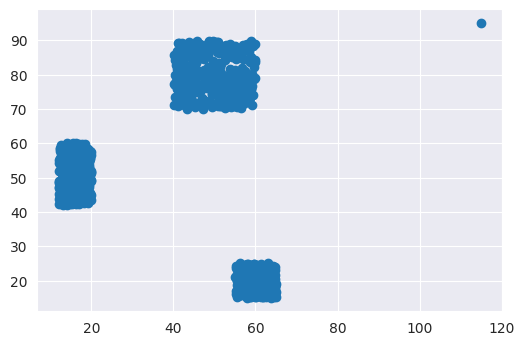

In [233]:
c2 = pd.read_csv("C2.txt", delim_whitespace=True, names=['x0', 'x1'])
print (c2)
plt.scatter(c2['x0'],c2['x1'])

In [0]:
data_set = []
for index, row in c2.iterrows():
        data_set.append([row['x0'], row['x1']]) 
data_set = np.array(data_set)

In [0]:
def get_rand_sites(data, clusters):
    sites = []
    initialCenters = set([])
    for i in range(clusters):
        initialCenter = random.randint(0,len(data))
        if initialCenter not in initialCenters:
            initialCenters.add(initialCenter)
            x = data[initialCenter]
            sites.append(x)
    return sites

In [0]:
def lloyd(data, cluster_num, iterations, sites):
    #global SSE
    global mean_cost
    ###Our "buckets"
    cluster_distance =[]
    clusters = [[] for i in range(cluster_num)]
    if sites is None: # If we weren't given a defined set of initial sites
        sites = get_rand_sites(data,cluster_num)
    for i in range(iterations): # 10 iterations will be sufficient enough for the given datasets
        #Evaluate every point in our given data set
        mean_cost = 0
        #print('length of data',len(data))        
        for point in range(len(data)):
            #print('%%%%%%%%%point',point)

            #### Find the closest site. Then append it to an appropriate cluster
            closestSiteNumber = 0
            closestSiteDistance = distance.euclidean(sites[0], data[point]) 
            #print('sites[0], data[point], closestSiteDistance////', sites[0], data[point], closestSiteDistance) 
            
            #### The top two statements assume the first site is the closest we will verify and update by 
            #### iterating through the remaining sites and comparing
            for siteNumber in range(1,len(sites),1):
                #print('siteNumber', siteNumber)
                siteDistance = distance.euclidean(sites[siteNumber], data[point])
                #print('sites[siteNumber], data[point],siteDistance///',sites[siteNumber], data[point],siteDistance)
                #print('siteDistance',siteDistance, 'closestSiteDistance///', closestSiteDistance)
                if siteDistance < closestSiteDistance:
                    #### This is where we reassign the "closest" site so far
                    closestSiteDistance = siteDistance
                    closestSiteNumber = siteNumber
                    #print('closestSiteDistance, closestSiteNumber///',closestSiteDistance, closestSiteNumber)
            #SSE += closestSiteDistance**2
            #print('SSE', SSE)
            ####After all the sites are checked we can 
            clusters[closestSiteNumber].append(data[point])
            #print(clusters)
            #print('closestSiteNumber,clusters[closestSiteNumber]///',closestSiteNumber,clusters[closestSiteNumber])

            cluster_distance.append(closestSiteDistance)

        for m in range(cluster_num):
            #print('m',m)
            #print('sites m///',sites[m])
            #print('cluster m///',clusters[m])
            #print('manual',mean(clusters[m]))
            sites[m] = np.mean(clusters[m], axis = 0)
            #print('sites m after running mean///',sites[m])
            clusters[m].clear()
    #print ('final SSE///',SSE)        
    #SSE = math.sqrt(SSE/len(data))
    #print('sqr sse///',SSE)
    #print (cluster_distance)

    #np.square(cluster_distance)
    #mean_cost = math.sqrt(np.sum(np.square(cluster_distance), axis=0) /len(data))
    #print('3-means cost:', mean_cost)

    return sites

In [240]:
cluster_points = lloyd(data_set,3,5, sites=[[13.51372985, 45.03355641], [115.,  95.], [64.53270534, 15.09821553]])
print('Cluster Centeroids:', cluster_points)

cluster_distance = np.full(len(data_set), np.inf)
clusters = [[] for i in range(3)]
for point_idx, point in enumerate(data_set):
    closest_center = 0
    for cluster_idx, cluster_point in enumerate(cluster_points):
        if cluster_distance[point_idx] is math.inf:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
            continue
        if distance.euclidean(point,cluster_point) < cluster_distance[point_idx]:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
            closest_center = cluster_idx
    clusters[closest_center].append(point)            

cost = math.sqrt(np.sum(cluster_distance**2, axis=0) /len(data_set))
print('3-means cost:', cost)

3-means cost: 35.28797103412428
Cluster Centeroids: [array([16.05121, 51.32798]), array([49.73053, 79.88286]), array([60.28161, 19.80588])]
3-means cost: 6.4764399645966


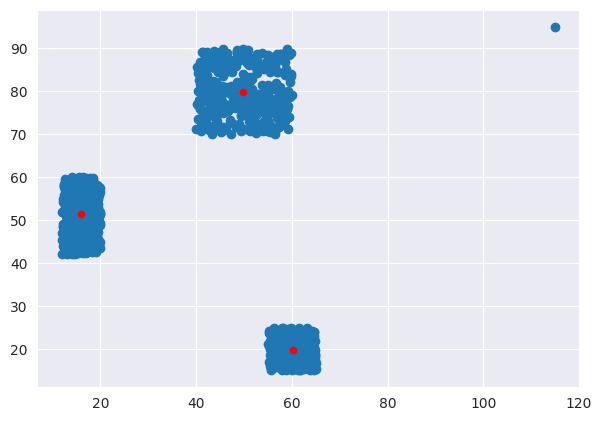

In [241]:
### Using Gonzalez centroids
#cluster_points = lloyd(data_set,3,1, sites=[[13.51372985, 45.03355641], [115.,  95.], [64.53270534, 15.09821553]])
plt.figure(figsize=(7,5), dpi=100)
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    plt.scatter(point[0],point[1], marker='o', c='red', s=20)

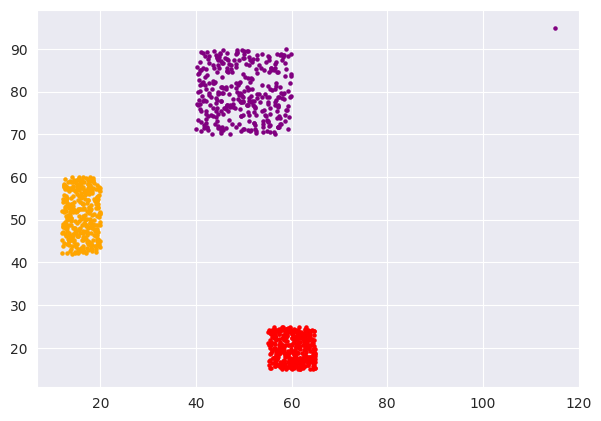

In [242]:
plt.figure(figsize=(7,5))
for index, point in enumerate(clusters[0]):
        plt.scatter(point[0],point[1], marker='o', c='orange', s=5)
for index, point in enumerate(clusters[1]):
        plt.scatter(point[0],point[1], marker='o', c='purple', s=5)
for index, point in enumerate(clusters[2]):
        plt.scatter(point[0],point[1], marker='o', c='red', s=5)

In [0]:
kmeanspp = [[[13.513729853983081, 45.033556411507824], [59.988874023477905, 22.274462216197847], [52.52590218071763, 70.73577721729384]],
            [[13.513729853983081, 45.033556411507824], [61.20574620043293, 22.735533528863808], [57.224897235758746, 76.73661216871683]],
            [[13.513729853983081, 45.033556411507824], [56.637296105355205, 18.29141651486513], [62.99100540430472, 17.281050233393078]],
            [[13.513729853983081, 45.033556411507824], [58.552091338498656, 74.50270456589206], [63.44553840817501, 17.8417449361255]],
            [[13.513729853983081, 45.033556411507824], [51.023921789061184, 78.58377515596645], [57.54558124438772, 21.16783392989684]],
            [[13.513729853983081, 45.033556411507824], [58.658466123311186, 73.1758589900369], [55.12623467284194, 73.05495448762835]],
            [[13.513729853983081, 45.033556411507824], [61.20574620043293, 22.735533528863808], [59.67521681187035, 78.7729651610088]],
            [[13.513729853983081, 45.033556411507824], [46.473799469822104, 87.73736100649961], [45.09216605802008, 71.38291604929103]],
            [[13.513729853983081, 45.033556411507824], [61.03378377212428, 22.097236963648506], [60.114176659008855, 15.071885176481585]],
            [[13.513729853983081, 45.033556411507824], [58.008674814101155, 20.63008344337366], [45.26322630719664, 70.86466404866877]],
            [[13.513729853983081, 45.033556411507824], [44.68411735362903, 88.22407274801745], [59.406271671531286, 17.211522895309464]],
            [[13.513729853983081, 45.033556411507824], [61.06197698151743, 18.83361807536688], [57.943785426320645, 24.85947690909029]],
            [[13.513729853983081, 45.033556411507824], [41.14955242295295, 89.26264840339012], [63.338424476271534, 16.41346373821168]],
            [[13.513729853983081, 45.033556411507824], [62.87643576643215, 18.366143825396424], [64.38707418972835, 18.212663432078863]],
            [[13.513729853983081, 45.033556411507824], [60.7532729651175, 15.915484394098044], [43.7965875056429, 85.46079879591508]],
            [[13.513729853983081, 45.033556411507824], [59.05425486042056, 18.16804527142228], [43.7965875056429, 85.46079879591508]],
            [[13.513729853983081, 45.033556411507824], [61.50881455460594, 16.586723893891833], [58.08321750233146, 20.706514335319692]],
            [[13.513729853983081, 45.033556411507824], [58.58144571635126, 22.67312082617855], [58.762301841513484, 15.063419670858998]],
            [[13.513729853983081, 45.033556411507824], [59.97617149322907, 19.138513742408268], [45.742184504858706, 71.09798629221457]],
            [[13.513729853983081, 45.033556411507824], [55.579930586494726, 15.1694010883857], [59.97617149322907, 19.138513742408268]]]

In [275]:
cost= []
new_centers = []
for point in kmeanspp:
    cluster_points = lloyd(data_set,3,10,point)
    #print('Cluster Centeroids:', cluster_points)
    cluster_distance = np.full(len(data_set), np.inf)
    clusters = [[] for i in range(3)]
    for point_idx, point in enumerate(data_set):
        closest_center = 0
        for cluster_idx, cluster_point in enumerate(cluster_points):
            if cluster_distance[point_idx] is math.inf:
                cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
                continue
            if distance.euclidean(point,cluster_point) < cluster_distance[point_idx]:
                cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
                closest_center = cluster_idx
        clusters[closest_center].append(point)            

    cost_trial = math.sqrt(np.sum(cluster_distance**2, axis=0) /len(data_set))
    #print('3-means cost:', cost_trial)    
    cost.append(cost_trial)
    new_centers.append(cluster_points)
print(cost)
center_list =np.array(new_centers).tolist()  
print(center_list)

[6.4764399645966, 6.4764399645966, 18.937702111113346, 6.4764399645966, 6.4764399645966, 6.4764399645966, 6.4764399645966, 6.4764399645966, 18.92876965326939, 6.4764399645966, 6.4764399645966, 6.4764399645966, 6.4764399645966, 18.937702111113346, 6.4764399645966, 6.4764399645966, 18.92876938934136, 18.92876965326939, 6.4764399645966, 18.92876965326939]
[[[16.051209666502103, 51.3279822823968], [60.28160890470579, 19.805876561065347], [49.73053084456542, 79.8828578622315]], [[16.051209666502103, 51.3279822823968], [60.28160890470579, 19.805876561065347], [49.73053084456542, 79.8828578622315]], [[32.89087025553376, 65.60542007231415], [57.61139114100336, 20.59202077301015], [62.277791116405666, 19.218176519126015]], [[16.051209666502103, 51.3279822823968], [49.73053084456542, 79.8828578622315], [60.28160890470579, 19.805876561065347]], [[16.051209666502103, 51.3279822823968], [49.73053084456542, 79.8828578622315], [60.28160890470579, 19.805876561065347]], [[16.051209666502103, 51.3279822

In [0]:
trials = len(kmeanspp)
totalFrac = 1/trials
cost = sorted(cost)
y = [cost.index(cost[z])*totalFrac for z in range(len(cost))]

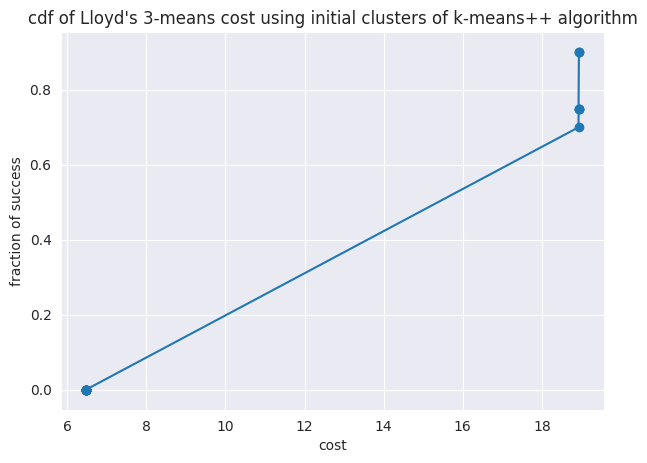

In [264]:
plt.figure(figsize=(7,5), dpi= 100)
plt.title("cdf of Lloyd's 3-means cost using initial clusters of k-means++ algorithm")
plt.xlabel("cost")
plt.ylabel("fraction of success")
#plt.xlim([np.min(cost)-.1,np.max(cost)])
#plt.ylim([-0.1,1.05])
plt.scatter(np.array(cost), np.array(y))
plt.plot(np.array(cost), np.array(y))
plt.show()

In [0]:
import random
cluster_points = lloyd(data_set,3,10, sites = None)
plt.figure(figsize=(7,5), dpi=100)
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    plt.scatter(point[0],point[1], marker='o', c='red', s=20)

In [244]:
cluster_points = lloyd(data_set,3,5, sites=[[13.51372985398308, 45.03355641150783], [15.075594712855686, 55.97440969831794], [19.71316191003929, 50.68096395347217]])
print('Cluster Centeroids:', cluster_points)

cluster_distance = np.full(len(data_set), np.inf)
clusters = [[] for i in range(3)]
for point_idx, point in enumerate(data_set):
    closest_center = 0
    for cluster_idx, cluster_point in enumerate(cluster_points):
        if cluster_distance[point_idx] is math.inf:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
            continue
        if distance.euclidean(point,cluster_point) < cluster_distance[point_idx]:
            cluster_distance[point_idx] = distance.euclidean(point,cluster_point)
            closest_center = cluster_idx
    clusters[closest_center].append(point)            

cost = math.sqrt(np.sum(cluster_distance**2, axis=0) /len(data_set))
print('3-means cost:', cost)

3-means cost: 44.88329522386449
Cluster Centeroids: [array([16.05121, 51.32798]), array([49.73053, 79.88286]), array([60.28161, 19.80588])]
3-means cost: 6.4764399645966


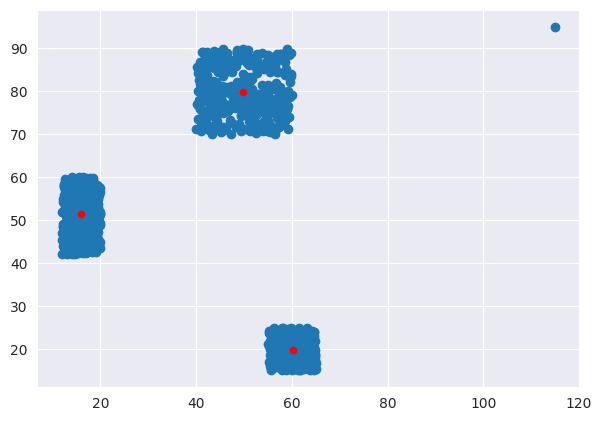

In [245]:
### Using first 3 points as centroids
#cluster_points = lloyd(data_set,3,1, sites=[[13.51372985398308, 45.03355641150783], [15.075594712855686, 55.97440969831794], [19.71316191003929, 50.68096395347217]])
plt.figure(figsize=(7,5), dpi=100)
plt.scatter(c2['x0'],c2['x1'])
for index, point in enumerate(cluster_points):
    plt.scatter(point[0],point[1], marker='o', c='red', s=20)

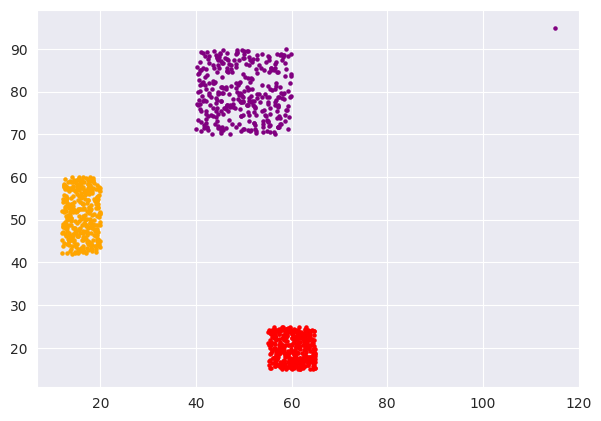

In [246]:
plt.figure(figsize=(7,5))
for index, point in enumerate(clusters[0]):
        plt.scatter(point[0],point[1], marker='o', c='orange', s=5)
for index, point in enumerate(clusters[1]):
        plt.scatter(point[0],point[1], marker='o', c='purple', s=5)
for index, point in enumerate(clusters[2]):
        plt.scatter(point[0],point[1], marker='o', c='red', s=5)

In [0]:
# This method calculates the center of gravity of a cluster of points.
# It isn't constrained by the amount of dimensions
def mean (cluster):
    #print('cluster',cluster)
    #print('cluster[0]',cluster[0])
    #print('numpy average', np.mean(cluster, axis = 0))
    average = [0 for i in range(len(cluster[0]))]
    for dimension in range(len(average)):
        for points in cluster:
            average[dimension] += points[dimension]
        average[dimension] /= len(cluster)
    return average